In [1]:
!pip install comtrade

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from dataset_helper_functions import *

# EDA
## Brief observation

In [3]:
from collections import Counter

# For KAGGLE users
# path = '/kaggle/input/oscillograms-46/' 

# For local usage
path = 'data/'
dataset = CustomOscDataset(path)

all_columns = []
total_rows = 0

for i, file in enumerate(tqdm(dataset)):
    if i == 0:
        print(f'#\tosc_name\trows\tcolumns')
    df_cur = file.to_dataframe()
    df_cur.reset_index(drop=False, inplace=True)
    df_cur.insert(0, 'file_name', '0' * df_cur.shape[0])
    all_columns.extend(df_cur.columns)
    total_rows += df_cur.shape[0]
    print(f'{i}\t{dataset.osc_files[i]}\t{df_cur.shape[0]}\t{df_cur.shape[1]}')
print('\nTotal number of rows:', total_rows)
unique_columns = Counter(all_columns)
unique_columns

  0%|          | 0/46 [00:00<?, ?it/s]

#	osc_name	rows	columns
0	osc_1_1.cfg	10400	15
1	osc_1_10.cfg	9600	15
2	osc_1_11.cfg	8800	15
3	osc_1_12.cfg	10400	16
4	osc_1_13.cfg	10400	19
5	osc_1_14.cfg	10400	19
6	osc_1_15.cfg	10400	20
7	osc_1_16.cfg	10400	18
8	osc_1_17.cfg	10400	18
9	osc_1_18.cfg	10400	17
10	osc_1_19.cfg	10400	18
11	osc_1_2.cfg	10400	19
12	osc_1_20.cfg	10400	17
13	osc_1_21.cfg	10400	16
14	osc_1_22.cfg	10400	19
15	osc_1_23.cfg	10400	16
16	osc_1_24.cfg	10400	22
17	osc_1_25.cfg	10400	19
18	osc_1_26.cfg	10400	16
19	osc_1_27.cfg	10400	16
20	osc_1_28.cfg	10400	16
21	osc_1_29.cfg	10400	19
22	osc_1_3.cfg	10400	17
23	osc_1_30.cfg	10400	18
24	osc_1_31.cfg	10400	20
25	osc_1_32.cfg	10400	18
26	osc_1_33.cfg	10400	18
27	osc_1_34.cfg	10400	17
28	osc_1_35.cfg	10400	18
29	osc_1_36.cfg	10400	18
30	osc_1_37.cfg	10400	18
31	osc_1_38.cfg	10400	19
32	osc_1_39.cfg	10400	17
33	osc_1_4.cfg	10400	19
34	osc_1_40.cfg	10400	19
35	osc_1_41.cfg	9244	16
36	osc_1_42.cfg	10400	19
37	osc_1_43.cfg	10400	17
38	osc_1_44.cfg	10400	18
39	osc_1_45.cfg	10

Counter({'file_name': 46,
         'time': 46,
         'IA 1ВВ': 13,
         'IC 1ВВ': 13,
         'UA1СШ': 46,
         'UB1СШ': 46,
         'UC1СШ': 46,
         'UN1СШ': 46,
         'IA 2ВВ': 13,
         'IC 2ВВ': 13,
         'UA2СШ': 46,
         'UB2СШ': 46,
         'UC2СШ': 46,
         'UN2СШ': 46,
         'Пуск осциллографа': 45,
         'IA1': 33,
         'IC1': 33,
         'IA2': 33,
         'IC2': 33,
         'MLsignal_12_1_1': 19,
         'MLsignal_2_3': 12,
         'MLsignal_2_1_2': 13,
         'MLsignal_2_2_1_2': 3,
         'MLsignal_2_2_1_1': 5,
         'MLsignal_2_2_1_3': 2,
         'MLsignal_1_1_2': 12,
         'MLsignal_1_3': 10,
         'MLsignal_1_1_1': 10,
         'MLsignal_12_1_2': 11,
         'MLsignal_1_2_1_3': 1,
         'MLsignal_2_1_1': 10,
         'MLsignal_1_2': 3,
         'MLsignal_1_3_1': 3,
         'Mlsignal_2_2_1_1': 1,
         'Mlsignal_12_2_1_1': 1,
         'Mlsignal_2_3': 1,
         'MLsignal_1_2_1_2': 1,
         'MLsi

In [4]:
print('Number of unique columns:', len(unique_columns))

Number of unique columns: 41


# Collect unique features

In [5]:
features = list(unique_columns.keys())

To unify names of the features, we will perform the following changes:
* UA1СШ  -> UA,
* UC2СШ  -> UC,
* IA 1ВВ -> IA and so on.

We may notice that there are mistyped features (e.g. `"Mlsignal_2_2_1_1"` instead of `"MLsignal_2_2_1_1"`). Let us fix that issue first.

Then we need to drop the indices (`1` or `2`) corresponding to the power supply sections, e.g. `MLsignal_1_2_1_1` turns to `MLsignal_2_1_1`, i.e. the first digit of `MLsignal_` index  was dropped.

In [6]:
unique_features = set()
for name in features:
    if ('I' in name) or ('U' in name):
        print('\n"Rename" before:', name)
        name = name[:2]
        print('"Rename" after :', name)
    if 'Ml' in name:
        print('\n"Rename" before:', name)
        name = name.replace('Ml', 'ML')
        print('"Rename" after: ', name)
    if ('MLsignal_1_' in name) or \
       ('MLsignal_2_' in name):
        print('\n"Drop section idx" before:', name)
        name = name.split('_', maxsplit=2)[0] + '_' + name.split('_', maxsplit=2)[2]
        print('"Drop section idx" after: ', name)
    unique_features.add(name)
print('--'*20)
print('\nNumber of unique features:', len(unique_features))
print('\nA list of unique features:')
print(*unique_features, sep=',\n', end='.')


"Rename" before: IA 1ВВ
"Rename" after : IA

"Rename" before: IC 1ВВ
"Rename" after : IC

"Rename" before: UA1СШ
"Rename" after : UA

"Rename" before: UB1СШ
"Rename" after : UB

"Rename" before: UC1СШ
"Rename" after : UC

"Rename" before: UN1СШ
"Rename" after : UN

"Rename" before: IA 2ВВ
"Rename" after : IA

"Rename" before: IC 2ВВ
"Rename" after : IC

"Rename" before: UA2СШ
"Rename" after : UA

"Rename" before: UB2СШ
"Rename" after : UB

"Rename" before: UC2СШ
"Rename" after : UC

"Rename" before: UN2СШ
"Rename" after : UN

"Rename" before: IA1
"Rename" after : IA

"Rename" before: IC1
"Rename" after : IC

"Rename" before: IA2
"Rename" after : IA

"Rename" before: IC2
"Rename" after : IC

"Drop section idx" before: MLsignal_2_3
"Drop section idx" after:  MLsignal_3

"Drop section idx" before: MLsignal_2_1_2
"Drop section idx" after:  MLsignal_1_2

"Drop section idx" before: MLsignal_2_2_1_2
"Drop section idx" after:  MLsignal_2_1_2

"Drop section idx" before: MLsignal_2_2_1_1
"Drop 

According to the subject matter expert's opinion, such features as`'Пуск осциллографа'` and `'UN'` are useless for our task. So we will remove them.

In [7]:
unique_features = list(unique_features)
unique_features.remove('Пуск осциллографа')
unique_features.remove('UN')
print('Number of unique_features:', len(unique_features))

Number of unique_features: 21


In [8]:
unique_features = sorted(unique_features, reverse=False)
print('Unique_features:')
print(*unique_features, sep=',\n', end='.\n')

Unique_features:
IA,
IC,
MLsignal_12_1_1,
MLsignal_12_1_2,
MLsignal_12_2_1_1,
MLsignal_12_3,
MLsignal_12_3_2,
MLsignal_1_1,
MLsignal_1_2,
MLsignal_2,
MLsignal_2_1_1,
MLsignal_2_1_2,
MLsignal_2_1_3,
MLsignal_3,
MLsignal_3_1,
MLsignal_3_2,
UA,
UB,
UC,
file_name,
time.


In the `get_dataframe()` function: implemented "merge 'MLsignal' features of the same PQD type of sections of the same number by "Logical OR" (e.g., MLsignal_12_2_1_1 and MLsignal_2_2_1_1 by logical OR = MLsignal_2).
It helps to decrease the number of features from 21 to 10.

Let us manually change positions of unique features obtained for better visual interpretation.

Finally, we got.

```python
unique_features = [
    'file_name',
    'time',
    'IA',
    'IC',
    'UA',
    'UB',
    'UC',
    'MLsignal_1',
    'MLsignal_2',
    'MLsignal_3']
  ```

In [9]:
unique_features = [
    'file_name',
    'time',
    'IA',
    'IC',
    'UA',
    'UB',
    'UC',
    'MLsignal_1',
    'MLsignal_2',
    'MLsignal_3']

# Create dataframe

In [10]:
columns_to_rename = {'IA1': 'IA',
                     'IC1': 'IC',
                     'IA2': 'IA',
                     'IC2': 'IC',
                     'UA1СШ': 'UA',
                     'UB1СШ': 'UB',
                     'UC1СШ': 'UC',
                     'UN1СШ': 'UN',
                     'UA2СШ': 'UA',
                     'UB2СШ': 'UB',
                     'UC2СШ': 'UC',
                     'UN2СШ': 'UN'}

# Full dataframe

In [11]:
full_dataframe = get_dataframe(path, unique_features, columns_to_rename)

Working on oscillograms:   0%|          | 0/46 [00:00<?, ?it/s]

0	osc_1_1.cfg is in progress...	Completed!
1	osc_1_10.cfg is in progress...	Completed!
2	osc_1_11.cfg is in progress...	Completed!
3	osc_1_12.cfg is in progress...	Completed!
4	osc_1_13.cfg is in progress...	Completed!
5	osc_1_14.cfg is in progress...	Completed!
6	osc_1_15.cfg is in progress...	Completed!
7	osc_1_16.cfg is in progress...	Completed!
8	osc_1_17.cfg is in progress...	Completed!
9	osc_1_18.cfg is in progress...	Completed!
10	osc_1_19.cfg is in progress...	Completed!
11	osc_1_2.cfg is in progress...	Completed!
12	osc_1_20.cfg is in progress...	Completed!
13	osc_1_21.cfg is in progress...	Completed!
14	osc_1_22.cfg is in progress...	Completed!
15	osc_1_23.cfg is in progress...	Completed!
16	osc_1_24.cfg is in progress...	
mistyped_columns: ['Mlsignal_2_2_1_1', 'Mlsignal_12_2_1_1', 'Mlsignal_2_3']
correct_cols: {'Mlsignal_2_2_1_1': 'MLsignal_2_2_1_1', 'Mlsignal_12_2_1_1': 'MLsignal_12_2_1_1', 'Mlsignal_2_3': 'MLsignal_2_3'}
Completed!
17	osc_1_25.cfg is in progress...	Complet

In [12]:
print(f"Dataframe shape: {full_dataframe.shape[0]} samples, {full_dataframe.shape[1]} features ")
full_dataframe

Dataframe shape: 949688 samples, 10 features 


,file_name,time,IA,IC,UA,UB,UC,MLsignal_1,MLsignal_2,MLsignal_3
0,osc_1_1.cfg_1,0.000000,0.856430,-0.083091,83.518433,-55.723404,-27.464115,0,0,0
1,osc_1_1.cfg_1,0.000625,1.104965,-0.294530,84.079941,-39.879848,-43.791805,0,0,0
2,osc_1_1.cfg_1,0.001250,1.270655,-0.496776,82.065109,-25.154858,-56.549877,0,0,0
3,osc_1_1.cfg_1,0.001875,1.279860,-0.616285,77.738182,-10.296308,-66.928207,0,0,0
4,osc_1_1.cfg_1,0.002500,1.031325,-0.634671,70.488098,5.497162,-75.488670,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10395,osc_1_9.cfg_2,6.496875,0.413849,0.329927,71.230019,-73.943100,2.070244,0,0,0
10396,osc_1_9.cfg_2,6.497500,0.469127,0.072775,78.692535,-65.239700,-14.095983,0,0,0
10397,osc_1_9.cfg_2,6.498125,0.570470,-0.055801,83.249298,-52.341480,-31.533710,0,0,0
10398,osc_1_9.cfg_2,6.498750,0.671813,-0.175193,83.529968,-37.131168,-47.006393,0,0,0


In [13]:
period = 1 / 50
samples = full_dataframe['time'][(full_dataframe['file_name'] == 'osc_1_40.cfg_1') & 
                                  (full_dataframe['time'] >= period) & 
                                  (full_dataframe['time'] < 2 * period)]
print(f'Number of samples within an oscillation period: {len(samples.values)}.')

Number of samples within an oscillation period: 32.


# Get targets: Sliding window

Targets description is in the table below:

|target|description|
|  :-:  |     :     |
|  0   |     Normal working condition: No disturbancies     |
|  1   |     Switch: On / Off (working condition)   |
|  2   |     Anomaly: Attention is all you need     |
|  3   |     Emergency     |

To get targets we will slide through the dataframe and analyze `MLsignal_` features.

## Columns to slide over

In [14]:
columns = full_dataframe.columns
columns

Index(['file_name', 'time', 'IA', 'IC', 'UA', 'UB', 'UC', 'MLsignal_1',
       'MLsignal_2', 'MLsignal_3'],
      dtype='object')

### Columns with `'MLsignal'` in their names

In [15]:
all_ML = [column for column in columns if 'MLsignal' in column]
assert len(all_ML) == 3
all_ML

['MLsignal_1', 'MLsignal_2', 'MLsignal_3']

## Get targets

In [16]:
window_size = 32
step = 1

In [17]:
targets = get_target(full_dataframe, all_ML, window_size=window_size, step=step)

  0%|          | 0/92 [00:00<?, ?it/s]

Completed!


In [18]:
len(targets)

946744

In [19]:
assert len(targets) == full_dataframe.shape[0] - len(full_dataframe['file_name'].unique()) * window_size

In [20]:
targets.value_counts()

0    905185
1     23855
2     15277
3      2427
dtype: int64

### Convert dataframe to Multi-index

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
features = ['file_name', 'IA', 'IC', 'UA', 'UB', 'UC']

In [23]:
# using the pandas set_index() function. 
full_dataframe = full_dataframe[features]
print("Unscaled Dataframe")
display(full_dataframe)

sample = pd.Series(full_dataframe.index.values, name='sample')
file_name = pd.Series(full_dataframe['file_name'].values, name='file_name')
full_dataframe.drop('file_name', axis=1, inplace=True)

# Standartization of data
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(full_dataframe.to_numpy())

df_scaled = pd.DataFrame(df_scaled, columns=full_dataframe.columns)
full_dataframe = pd.concat((file_name, sample, df_scaled), axis=1)

print("Scaled Dataframe Using StandardScaler")
display(full_dataframe)

Unscaled Dataframe


,file_name,IA,IC,UA,UB,UC
0,osc_1_1.cfg_1,0.856430,-0.083091,83.518433,-55.723404,-27.464115
1,osc_1_1.cfg_1,1.104965,-0.294530,84.079941,-39.879848,-43.791805
2,osc_1_1.cfg_1,1.270655,-0.496776,82.065109,-25.154858,-56.549877
3,osc_1_1.cfg_1,1.279860,-0.616285,77.738182,-10.296308,-66.928207
4,osc_1_1.cfg_1,1.031325,-0.634671,70.488098,5.497162,-75.488670
...,...,...,...,...,...,...
10395,osc_1_9.cfg_2,0.413849,0.329927,71.230019,-73.943100,2.070244
10396,osc_1_9.cfg_2,0.469127,0.072775,78.692535,-65.239700,-14.095983
10397,osc_1_9.cfg_2,0.570470,-0.055801,83.249298,-52.341480,-31.533710
10398,osc_1_9.cfg_2,0.671813,-0.175193,83.529968,-37.131168,-47.006393


Scaled Dataframe Using StandardScaler


C:\ProgramData\Anaconda3\envs\hse_env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,file_name,sample,IA,IC,UA,UB,UC
0,osc_1_1.cfg_1,0,1.169961,-0.106191,1.437608,-0.948037,-0.465886
1,osc_1_1.cfg_1,1,1.510900,-0.358231,1.447274,-0.678511,-0.742868
2,osc_1_1.cfg_1,2,1.738192,-0.599313,1.412590,-0.428014,-0.959296
3,osc_1_1.cfg_1,3,1.750819,-0.741771,1.338106,-0.175245,-1.135354
4,osc_1_1.cfg_1,4,1.409881,-0.763687,1.213301,0.093429,-1.280573
...,...,...,...,...,...,...,...
949683,osc_1_9.cfg_2,10395,0.562831,0.386136,1.226073,-1.257985,0.035135
949684,osc_1_9.cfg_2,10396,0.638661,0.079604,1.354534,-1.109925,-0.239109
949685,osc_1_9.cfg_2,10397,0.777683,-0.073661,1.432975,-0.890505,-0.534922
949686,osc_1_9.cfg_2,10398,0.916705,-0.215979,1.437806,-0.631751,-0.797400


In [24]:
full_dataframe = full_dataframe.set_index(['file_name', 'sample'])
full_dataframe

IA        IC        UA        UB        UC
file_name     sample                                                  
osc_1_1.cfg_1 0       1.169961 -0.106191  1.437608 -0.948037 -0.465886
              1       1.510900 -0.358231  1.447274 -0.678511 -0.742868
              2       1.738192 -0.599313  1.412590 -0.428014 -0.959296
              3       1.750819 -0.741771  1.338106 -0.175245 -1.135354
              4       1.409881 -0.763687  1.213301  0.093429 -1.280573
...                        ...       ...       ...       ...       ...
osc_1_9.cfg_2 10395   0.562831  0.386136  1.226073 -1.257985  0.035135
              10396   0.638661  0.079604  1.354534 -1.109925 -0.239109
              10397   0.777683 -0.073661  1.432975 -0.890505 -0.534922
              10398   0.916705 -0.215979  1.437806 -0.631751 -0.797400
              10399   1.005173 -0.358297  1.392902 -0.392383 -0.989287

[949688 rows x 5 columns]

### Create dataset

In [25]:
full_dataset = MyDataset(full_dataframe, targets,
                          window_size=window_size)

Creating sequence of samples:   0%|          | 0/92 [00:00<?, ?it/s]

In [26]:
assert len(full_dataset.window_end_indices) == len(targets)

# Train, validation and test split

### To maintain repeatability we will use `seed_everything` function recommended [here](https://gist.github.com/ihoromi4/b681a9088f348942b01711f251e5f964)

In [27]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [28]:
from training_helper_functions import *

In [29]:
SEED = 42

In [30]:
seed_everything(SEED)

train_size = int(0.8 * len(full_dataset))
val_test_size = len(full_dataset) - train_size
train_dataset, val_test_dataset = random_split(full_dataset,
                                          [train_size, val_test_size])
val_size = int(0.5 * len(val_test_dataset))
test_size = len(val_test_dataset) - val_size
val_dataset, test_dataset = random_split(val_test_dataset,
                                          [val_size, test_size])

In [31]:
dataset = dict()
dataset['train'], dataset['val'], dataset['test'] = \
train_dataset, val_dataset, test_dataset

In [32]:
len(full_dataset), len(train_dataset), len(val_dataset), len(test_dataset)

(946744, 757395, 94674, 94675)

In [33]:
assert len(full_dataset) == len(train_dataset) + len(val_dataset) + len(test_dataset)

In [34]:
train_targets = pd.Series([label for _, label in train_dataset])
val_targets   = pd.Series([label for _, label in val_dataset])
test_targets  = pd.Series([label for _, label in test_dataset])

#### Visualiize distribution of targets

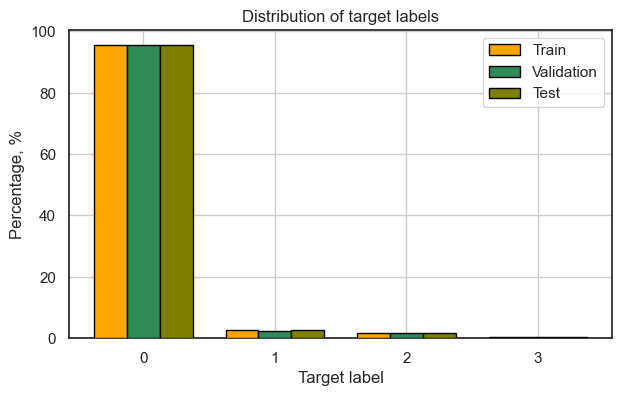

In [35]:
target_distribution(train_targets,
                    val_targets,
                    test_targets,
                    num_classes=4)

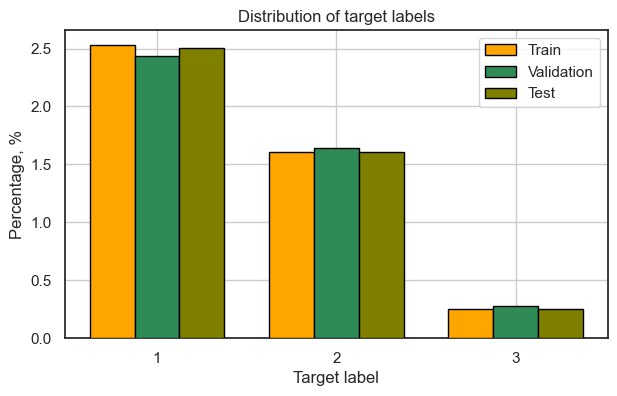

In [36]:
target_distribution(train_targets,
                    val_targets,
                    test_targets,
                    num_classes=3)

#### Save datasets into `pickle` files

In [37]:
def store_dataset(file_name, dataset):
    with open(f'{path}/{file_name}.pickle', 'wb') as output:
        pickle.dump(dataset, output)
    return f'Dataset was stored at "{path}/{file_name}.pickle"'

In [38]:
import pickle
import time

train_path = f'{path}\train_dataset.pickle'

if not os.path.exists(path):
    
    for name, data in dataset.items():
        name = name + '_dataset' 
        log = store_dataset(name, data)
        print(log)   

#### Restore dataset from `pickle`

In [39]:
import pickle

if os.path.exists(path):

    dataset_name = ['train', 'val', 'test']
    dataset = dict()

    for name in dataset_name:
        with open(f'{path}/{name}_dataset.pickle', 'rb') as data:
            dataset[name] = pickle.load(data)

In [40]:
dataset

{'train': <torch.utils.data.dataset.Subset at 0x2affa1d6788>,
 'val': <torch.utils.data.dataset.Subset at 0x2affa1d0588>,
 'test': <torch.utils.data.dataset.Subset at 0x2affa1d67c8>}

In [41]:
train_dataset, val_dataset, test_dataset = \
dataset['train'], dataset['val'], dataset['test']

# Create dataloaders

In [42]:
from torch.utils.data import DataLoader
import torch
import os
from torch import nn
import time
import random


In [43]:
batch_size = 32

#### Create the DataLoaders for our training, validation and test sets.

In [44]:
seed_everything(SEED)

train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            batch_size = batch_size, # Trains with this batch size.
            shuffle=True)

val_dataloader = DataLoader(
            val_dataset, # The validation samples.
            batch_size = batch_size, # Evaluate with this batch size.
            shuffle=True)

test_dataloader = DataLoader(
            test_dataset, # The test samples.
            batch_size=batch_size,
            shuffle=True)

In [45]:
len(train_dataset)

757395

In [46]:
len(train_dataloader) * batch_size

757408

Let us create a dictionary `dataloaders`, this will make usage of  `train_dataloader`, `validation_dataloader` and `test_dataloader` more convenient.

In [47]:
dataloaders = {
    'Train': train_dataloader,
    'Valid': val_dataloader,
    'Test': test_dataloader
}
dataloaders

{'Train': <torch.utils.data.dataloader.DataLoader at 0x2affa1d6548>,
 'Valid': <torch.utils.data.dataloader.DataLoader at 0x2af85de5d48>,
 'Test': <torch.utils.data.dataloader.DataLoader at 0x2af85de5948>}

In [48]:
dataset_sizes = {
    'Train': len(train_dataloader.dataset),
    'Valid': len(val_dataloader.dataset),
    'Test': len(test_dataloader.dataset)
}
dataset_sizes

{'Train': 757395, 'Valid': 94674, 'Test': 94675}

# Models

## 1. Multilayer Perceptron Model (MLP)

In [49]:
from torch.optim import Adam, NAdam, lr_scheduler
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score
import torch.nn.functional as F

In [50]:
n_out = 4                 # number of targets
train_dataset[0][0].shape # in_features

(32, 5)

In [51]:
window_size = 32
step = 1

In [52]:
class MLP(nn.Module):
    def __init__(self, window_size: int=window_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(5 * window_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 4))
    def forward(self, x):
        return self.layers(x)

## 2. CNN

In [53]:
class CNN(nn.Module):    
    def __init__(self, batch_size=32, window_size=32, features_size=5):        
        super(CNN, self).__init__()
        self.batch_size = batch_size
        self.window_size = window_size
        self.features_size = features_size 
        self.conv1 = nn.Conv1d(features_size, features_size * 4, 2, 2, groups=5)        
        self.pool1 = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(features_size * 4, features_size * 16, 2, 2, groups=20)       
        self.pool2 = nn.MaxPool1d(2, 2)
        self.fc1 = nn.Linear(160, 80)
        self.fc2 = nn.Linear(80, 4)
        
    def forward(self, x):
        self.bach_size = x.shape[0]
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.reshape(self.bach_size, 160)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)        
        return x

## 3. GRU

In [54]:
class GRU(nn.Module):    
    def __init__(self, num_sensors=32, num_states=4, hidden_dim=128, num_layers=2, dropout=0.4):
        super().__init__()
        self.gru = nn.GRU(num_sensors, hidden_dim, num_layers, batch_first=True)
        self.linear1 = nn.Linear(hidden_dim*num_layers, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_dim, num_states)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        h = self.gru(x)[1].permute(1, 0, 2)
        h = h.reshape(h.size(0), -1)
        linear_out = self.linear1(h)
        linear_out = torch.relu(linear_out)
        linear_out = self.dropout(linear_out)
        out = self.linear2(linear_out)
        return out

# Preparation for training the models

Check the potential ability to use GPU for model training.

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device.type

'cuda'

# Training models:
### 5 times to average metrics obtained on test data
### 6 epochs for each training process

# MLP

In [34]:
average_metrics = {}
metrics = {'b_acc': 0,
           'kappa': 0,
           'f1_sc': np.zeros((1, 4))          
              }
num_trainings = 5
num_epochs = 6
for i in trange(num_trainings, desc=f'Trainings for MLP'):
    seed_everything(i)
    model = MLP(window_size=window_size)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)
    print(f'Model {model._get_name()} training {i+1}')
    _, model = train_model(model, dataloaders, criterion,
                             optimizer, exp_lr_scheduler, num_epochs=num_epochs, SEED=i)
    print()
    print(f'Evaluate {model._get_name()} model_{i+1} on test data:')
    b_accuracy, kappa, f1 = test(model, dataloaders['Test'], SEED=i)
    metrics['b_acc'] += b_accuracy
    metrics['kappa'] += kappa
    metrics['f1_sc'] += f1
    print('b_acc =', np.around(b_accuracy, 3))
    print('kappa =', np.around(kappa, 3))
    print('f1_sc =', np.around(f1, 3), '\n')
    print('*' * 125, end='\n\n')

average_metrics[model._get_name()] = {}
for key, value in metrics.items():
    average_metrics[model._get_name()][key] = np.around(value / num_trainings, 3)
    
for key, value in average_metrics.items():
    print(key, value)

Trainings for MLP:   0%|          | 0/5 [00:00<?, ?it/s]

Model MLP training 1
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1136



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0929
Learning rate = 0.001 

Metrics:
	- b_acc = 0.657
	- kappa = 0.706
	- F1-sc = [0.99  0.548 0.908 0.462]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0952



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0934
Learning rate = 0.001 

Metrics:
	- b_acc = 0.724
	- kappa = 0.734
	- F1-sc = [0.99  0.59  0.933 0.586]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0873



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0909
Learning rate = 0.001 

Metrics:
	- b_acc = 0.707
	- kappa = 0.753
	- F1-sc = [0.991 0.618 0.94  0.577]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0847



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0792
Learning rate = 0.001 

Metrics:
	- b_acc = 0.711
	- kappa = 0.75
	- F1-sc = [0.991 0.597 0.947 0.583]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0695



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0801
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.778
	- kappa = 0.774
	- F1-sc = [0.991 0.626 0.964 0.759]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0672



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0656
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.775
	- kappa = 0.781
	- F1-sc = [0.992 0.636 0.967 0.739]
------------------------------

Training complete in 0:05:18 (hh:mm:ss)
Best average F1-score: 0.835074 was at epoch 5

Evaluate MLP model_1 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.759
kappa = 0.76
f1_sc = [0.991 0.61  0.96  0.733] 

*****************************************************************************************************************************

Model MLP training 2
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1141



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0930
Learning rate = 0.001 

Metrics:
	- b_acc = 0.675
	- kappa = 0.727
	- F1-sc = [0.99  0.584 0.923 0.486]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0945



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0894
Learning rate = 0.001 

Metrics:
	- b_acc = 0.673
	- kappa = 0.722
	- F1-sc = [0.99  0.556 0.929 0.529]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0876



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0887
Learning rate = 0.001 

Metrics:
	- b_acc = 0.693
	- kappa = 0.73
	- F1-sc = [0.99  0.557 0.94  0.576]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0840



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0820
Learning rate = 0.001 

Metrics:
	- b_acc = 0.76
	- kappa = 0.768
	- F1-sc = [0.991 0.642 0.948 0.67 ]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0698



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0677
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.761
	- kappa = 0.785
	- F1-sc = [0.992 0.651 0.967 0.678]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0662



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0627
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.772
	- kappa = 0.784
	- F1-sc = [0.992 0.634 0.972 0.744]
------------------------------

Training complete in 0:05:16 (hh:mm:ss)
Best average F1-score: 0.835528 was at epoch 6

Evaluate MLP model_2 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.758
kappa = 0.769
f1_sc = [0.992 0.622 0.963 0.718] 

*****************************************************************************************************************************

Model MLP training 3
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1132



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.1048
Learning rate = 0.001 

Metrics:
	- b_acc = 0.654
	- kappa = 0.689
	- F1-sc = [0.989 0.508 0.92  0.46 ]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0934



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0919
Learning rate = 0.001 

Metrics:
	- b_acc = 0.671
	- kappa = 0.724
	- F1-sc = [0.99  0.566 0.928 0.501]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0879



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0893
Learning rate = 0.001 

Metrics:
	- b_acc = 0.72
	- kappa = 0.745
	- F1-sc = [0.99  0.603 0.945 0.597]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0840



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0796
Learning rate = 0.001 

Metrics:
	- b_acc = 0.725
	- kappa = 0.751
	- F1-sc = [0.991 0.597 0.95  0.652]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0703



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0656
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.764
	- kappa = 0.774
	- F1-sc = [0.992 0.629 0.962 0.725]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0667



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0606
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.781
	- kappa = 0.794
	- F1-sc = [0.992 0.653 0.973 0.748]
------------------------------

Training complete in 0:05:25 (hh:mm:ss)
Best average F1-score: 0.841620 was at epoch 6

Evaluate MLP model_3 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.77
kappa = 0.784
f1_sc = [0.992 0.644 0.97  0.735] 

*****************************************************************************************************************************

Model MLP training 4
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1126



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0933
Learning rate = 0.001 

Metrics:
	- b_acc = 0.638
	- kappa = 0.722
	- F1-sc = [0.99  0.576 0.915 0.33 ]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0941



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0926
Learning rate = 0.001 

Metrics:
	- b_acc = 0.699
	- kappa = 0.724
	- F1-sc = [0.99  0.55  0.937 0.604]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0879



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0850
Learning rate = 0.001 

Metrics:
	- b_acc = 0.706
	- kappa = 0.757
	- F1-sc = [0.991 0.62  0.942 0.554]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0837



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0824
Learning rate = 0.001 

Metrics:
	- b_acc = 0.718
	- kappa = 0.763
	- F1-sc = [0.991 0.63  0.948 0.594]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0700



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0672
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.757
	- kappa = 0.778
	- F1-sc = [0.992 0.634 0.961 0.711]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0674



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0664
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.78
	- kappa = 0.784
	- F1-sc = [0.992 0.651 0.969 0.713]
------------------------------

Training complete in 0:05:23 (hh:mm:ss)
Best average F1-score: 0.831002 was at epoch 6

Evaluate MLP model_4 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.773
kappa = 0.773
f1_sc = [0.991 0.639 0.966 0.716] 

*****************************************************************************************************************************

Model MLP training 5
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1134



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0990
Learning rate = 0.001 

Metrics:
	- b_acc = 0.627
	- kappa = 0.699
	- F1-sc = [0.99  0.533 0.913 0.377]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0944



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0855
Learning rate = 0.001 

Metrics:
	- b_acc = 0.724
	- kappa = 0.745
	- F1-sc = [0.99  0.605 0.937 0.614]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0882



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0891
Learning rate = 0.001 

Metrics:
	- b_acc = 0.73
	- kappa = 0.742
	- F1-sc = [0.991 0.581 0.946 0.59 ]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0852



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0798
Learning rate = 0.001 

Metrics:
	- b_acc = 0.719
	- kappa = 0.754
	- F1-sc = [0.991 0.594 0.951 0.642]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0703



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0641
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.774
	- kappa = 0.786
	- F1-sc = [0.992 0.649 0.966 0.737]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0668



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0686
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.767
	- kappa = 0.772
	- F1-sc = [0.992 0.616 0.962 0.734]
------------------------------

Training complete in 0:05:24 (hh:mm:ss)
Best average F1-score: 0.836026 was at epoch 5

Evaluate MLP model_5 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.767
kappa = 0.768
f1_sc = [0.991 0.625 0.962 0.747] 

*****************************************************************************************************************************

MLP {'b_acc': 0.766, 'kappa': 0.771, 'f1_sc': array([[0.991, 0.628, 0.964, 0.73 ]])}


# CNN

In [35]:
metrics = {'b_acc': 0,
           'kappa': 0,
           'f1_sc': np.zeros((1, 4))}
for i in trange(num_trainings, desc=f'Trainings for CNN'):
    seed_everything(i)
    model = CNN(batch_size=32, window_size=32, features_size=5)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)
    print(f'Model {model._get_name()} training {i+1}')
    _, model = train_model(model, dataloaders, criterion,
                             optimizer, exp_lr_scheduler, num_epochs=num_epochs, SEED=i)
    print()
    print(f'Evaluate {model._get_name()} model_{i+1} on test data:')
    b_accuracy, kappa, f1 = test(model, dataloaders['Test'], SEED=i)
    metrics['b_acc'] += b_accuracy
    metrics['kappa'] += kappa
    metrics['f1_sc'] += f1
    print('b_acc =', np.around(b_accuracy, 3))
    print('kappa =', np.around(kappa, 3))
    print('f1_sc =', np.around(f1, 3), '\n')
    print('*' * 125, end='\n\n')
average_metrics[model._get_name()] = {}
for key, value in metrics.items():
    average_metrics[model._get_name()][key] = np.around(value / num_trainings, 3)
    
for key, value in average_metrics.items():
    print(key, value)

Trainings for CNN:   0%|          | 0/5 [00:00<?, ?it/s]

Model CNN training 1
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1164



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0845
Learning rate = 0.001 

Metrics:
	- b_acc = 0.647
	- kappa = 0.689
	- F1-sc = [0.989 0.514 0.909 0.499]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0767



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0657
Learning rate = 0.001 

Metrics:
	- b_acc = 0.766
	- kappa = 0.767
	- F1-sc = [0.991 0.633 0.942 0.69 ]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0652



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0641
Learning rate = 0.001 

Metrics:
	- b_acc = 0.769
	- kappa = 0.785
	- F1-sc = [0.992 0.654 0.955 0.719]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0600



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0574
Learning rate = 0.001 

Metrics:
	- b_acc = 0.779
	- kappa = 0.795
	- F1-sc = [0.992 0.675 0.953 0.746]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0506



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0599
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.841
	- kappa = 0.824
	- F1-sc = [0.993 0.723 0.97  0.793]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0477



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0536
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.852
	- kappa = 0.838
	- F1-sc = [0.993 0.744 0.974 0.8  ]
------------------------------

Training complete in 0:06:43 (hh:mm:ss)
Best average F1-score: 0.877710 was at epoch 6

Evaluate CNN model_1 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.85
kappa = 0.839
f1_sc = [0.993 0.752 0.976 0.784] 

*****************************************************************************************************************************

Model CNN training 2
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1114



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0762
Learning rate = 0.001 

Metrics:
	- b_acc = 0.664
	- kappa = 0.7
	- F1-sc = [0.99  0.513 0.917 0.562]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0689



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0633
Learning rate = 0.001 

Metrics:
	- b_acc = 0.76
	- kappa = 0.771
	- F1-sc = [0.991 0.645 0.935 0.714]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0597



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0542
Learning rate = 0.001 

Metrics:
	- b_acc = 0.783
	- kappa = 0.784
	- F1-sc = [0.992 0.646 0.95  0.775]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0552



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0501
Learning rate = 0.001 

Metrics:
	- b_acc = 0.829
	- kappa = 0.813
	- F1-sc = [0.993 0.712 0.954 0.793]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0474



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0446
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.807
	- kappa = 0.811
	- F1-sc = [0.993 0.697 0.957 0.806]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0453



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0435
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.81
	- kappa = 0.814
	- F1-sc = [0.993 0.703 0.955 0.807]
------------------------------

Training complete in 0:06:43 (hh:mm:ss)
Best average F1-score: 0.864462 was at epoch 6

Evaluate CNN model_2 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.796
kappa = 0.807
f1_sc = [0.993 0.705 0.95  0.77 ] 

*****************************************************************************************************************************

Model CNN training 3
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1141



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0805
Learning rate = 0.001 

Metrics:
	- b_acc = 0.658
	- kappa = 0.706
	- F1-sc = [0.99  0.549 0.912 0.512]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0763



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0672
Learning rate = 0.001 

Metrics:
	- b_acc = 0.734
	- kappa = 0.762
	- F1-sc = [0.991 0.629 0.938 0.656]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0657



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0609
Learning rate = 0.001 

Metrics:
	- b_acc = 0.768
	- kappa = 0.791
	- F1-sc = [0.992 0.669 0.954 0.698]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0590



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0556
Learning rate = 0.001 

Metrics:
	- b_acc = 0.745
	- kappa = 0.78
	- F1-sc = [0.992 0.648 0.946 0.695]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0493



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0436
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.814
	- kappa = 0.824
	- F1-sc = [0.993 0.725 0.962 0.767]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0461



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0430
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.818
	- kappa = 0.827
	- F1-sc = [0.993 0.719 0.967 0.796]
------------------------------

Training complete in 0:06:44 (hh:mm:ss)
Best average F1-score: 0.868712 was at epoch 6

Evaluate CNN model_3 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.797
kappa = 0.818
f1_sc = [0.993 0.722 0.956 0.737] 

*****************************************************************************************************************************

Model CNN training 4
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1146



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0783
Learning rate = 0.001 

Metrics:
	- b_acc = 0.667
	- kappa = 0.718
	- F1-sc = [0.99  0.561 0.921 0.505]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0709



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0637
Learning rate = 0.001 

Metrics:
	- b_acc = 0.757
	- kappa = 0.779
	- F1-sc = [0.992 0.662 0.934 0.701]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0609



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0554
Learning rate = 0.001 

Metrics:
	- b_acc = 0.799
	- kappa = 0.807
	- F1-sc = [0.993 0.682 0.962 0.756]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0561



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0508
Learning rate = 0.001 

Metrics:
	- b_acc = 0.786
	- kappa = 0.807
	- F1-sc = [0.993 0.701 0.955 0.715]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0474



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0444
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.814
	- kappa = 0.826
	- F1-sc = [0.993 0.718 0.97  0.782]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0456



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0430
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.853
	- kappa = 0.835
	- F1-sc = [0.993 0.742 0.971 0.807]
------------------------------

Training complete in 0:06:44 (hh:mm:ss)
Best average F1-score: 0.878297 was at epoch 6

Evaluate CNN model_4 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.843
kappa = 0.828
f1_sc = [0.993 0.74  0.968 0.786] 

*****************************************************************************************************************************

Model CNN training 5
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.1104



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0802
Learning rate = 0.001 

Metrics:
	- b_acc = 0.634
	- kappa = 0.701
	- F1-sc = [0.99  0.552 0.9   0.439]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0715



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0618
Learning rate = 0.001 

Metrics:
	- b_acc = 0.755
	- kappa = 0.771
	- F1-sc = [0.991 0.632 0.949 0.688]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0586



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0494
Learning rate = 0.001 

Metrics:
	- b_acc = 0.807
	- kappa = 0.809
	- F1-sc = [0.993 0.686 0.966 0.772]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0529



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0482
Learning rate = 0.001 

Metrics:
	- b_acc = 0.805
	- kappa = 0.82
	- F1-sc = [0.993 0.706 0.968 0.765]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0440



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0419
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.815
	- kappa = 0.822
	- F1-sc = [0.993 0.71  0.968 0.767]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0417



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0391
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.84
	- kappa = 0.835
	- F1-sc = [0.994 0.727 0.973 0.819]
------------------------------

Training complete in 0:06:43 (hh:mm:ss)
Best average F1-score: 0.878080 was at epoch 6

Evaluate CNN model_5 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.826
kappa = 0.828
f1_sc = [0.993 0.727 0.97  0.777] 

*****************************************************************************************************************************

MLP {'b_acc': 0.766, 'kappa': 0.771, 'f1_sc': array([[0.991, 0.628, 0.964, 0.73 ]])}
CNN {'b_acc': 0.823, 'kappa': 0.824, 'f1_sc': array([[0.993, 0.729, 0.964, 0.771]])}


# GRU

In [36]:
metrics = {'b_acc': 0,
           'kappa': 0,
           'f1_sc': np.zeros((1, 4))          
              }
for i in trange(num_trainings, desc=f'Trainings for GRU'):
    seed_everything(i)
    model = GRU(num_sensors=32, num_states=4, hidden_dim=128, num_layers=2,dropout=0.40)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)
    print(f'Model {model._get_name()} training {i+1}')
    _, model = train_model(model, dataloaders, criterion,
                             optimizer, exp_lr_scheduler, num_epochs=num_epochs, SEED=i)
    print()
    print(f'Evaluate {model._get_name()} model_{i+1} on test data:')
    b_accuracy, kappa, f1 = test(model, dataloaders['Test'], SEED=i)
    metrics['b_acc'] += b_accuracy
    metrics['kappa'] += kappa
    metrics['f1_sc'] += f1
    print('b_acc =', np.around(b_accuracy, 3))
    print('kappa =', np.around(kappa, 3))
    print('f1_sc =', np.around(f1, 3), '\n')
    print('*' * 125, end='\n\n')
average_metrics[model._get_name()] = {}
for key, value in metrics.items():
    average_metrics[model._get_name()][key] = np.around(value / num_trainings, 3)

for key, value in average_metrics.items():
    print(key, value)

Trainings for GRU:   0%|          | 0/5 [00:00<?, ?it/s]

Model GRU training 1
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0822



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0568
Learning rate = 0.001 

Metrics:
	- b_acc = 0.783
	- kappa = 0.787
	- F1-sc = [0.992 0.671 0.934 0.778]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0535



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0465
Learning rate = 0.001 

Metrics:
	- b_acc = 0.814
	- kappa = 0.817
	- F1-sc = [0.993 0.734 0.938 0.805]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0478



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0442
Learning rate = 0.001 

Metrics:
	- b_acc = 0.832
	- kappa = 0.825
	- F1-sc = [0.993 0.722 0.954 0.857]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0459



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0433
Learning rate = 0.001 

Metrics:
	- b_acc = 0.849
	- kappa = 0.836
	- F1-sc = [0.993 0.748 0.956 0.878]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0369



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0338
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.889
	- kappa = 0.866
	- F1-sc = [0.995 0.783 0.975 0.925]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0344



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0458
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.896
	- kappa = 0.851
	- F1-sc = [0.994 0.794 0.92  0.929]
------------------------------

Training complete in 0:07:47 (hh:mm:ss)
Best average F1-score: 0.919444 was at epoch 5

Evaluate GRU model_1 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.877
kappa = 0.86
f1_sc = [0.994 0.782 0.973 0.877] 

*****************************************************************************************************************************

Model GRU training 2
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0795



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0500
Learning rate = 0.001 

Metrics:
	- b_acc = 0.809
	- kappa = 0.798
	- F1-sc = [0.992 0.69  0.941 0.794]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0523



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0463
Learning rate = 0.001 

Metrics:
	- b_acc = 0.805
	- kappa = 0.805
	- F1-sc = [0.993 0.689 0.949 0.831]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0477



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0419
Learning rate = 0.001 

Metrics:
	- b_acc = 0.852
	- kappa = 0.832
	- F1-sc = [0.994 0.731 0.959 0.869]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0457



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0468
Learning rate = 0.001 

Metrics:
	- b_acc = 0.797
	- kappa = 0.816
	- F1-sc = [0.993 0.717 0.947 0.82 ]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0363



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0331
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.887
	- kappa = 0.866
	- F1-sc = [0.995 0.779 0.976 0.933]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0340



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0305
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.888
	- kappa = 0.871
	- F1-sc = [0.995 0.785 0.978 0.938]
------------------------------

Training complete in 0:07:46 (hh:mm:ss)
Best average F1-score: 0.924084 was at epoch 6

Evaluate GRU model_2 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.867
kappa = 0.867
f1_sc = [0.995 0.788 0.975 0.882] 

*****************************************************************************************************************************

Model GRU training 3
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0798



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0510
Learning rate = 0.001 

Metrics:
	- b_acc = 0.809
	- kappa = 0.812
	- F1-sc = [0.993 0.729 0.93  0.783]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0512



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0418
Learning rate = 0.001 

Metrics:
	- b_acc = 0.847
	- kappa = 0.831
	- F1-sc = [0.993 0.733 0.953 0.857]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0469



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0407
Learning rate = 0.001 

Metrics:
	- b_acc = 0.837
	- kappa = 0.84
	- F1-sc = [0.994 0.76  0.951 0.833]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0449



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0452
Learning rate = 0.001 

Metrics:
	- b_acc = 0.851
	- kappa = 0.825
	- F1-sc = [0.993 0.753 0.923 0.867]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0361



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0308
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.889
	- kappa = 0.871
	- F1-sc = [0.995 0.784 0.979 0.933]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0336



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0292
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.899
	- kappa = 0.877
	- F1-sc = [0.995 0.795 0.983 0.934]
------------------------------

Training complete in 0:07:47 (hh:mm:ss)
Best average F1-score: 0.926775 was at epoch 6

Evaluate GRU model_3 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.893
kappa = 0.874
f1_sc = [0.995 0.797 0.983 0.895] 

*****************************************************************************************************************************

Model GRU training 4
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0795



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0565
Learning rate = 0.001 

Metrics:
	- b_acc = 0.754
	- kappa = 0.77
	- F1-sc = [0.992 0.65  0.921 0.748]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0527



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0485
Learning rate = 0.001 

Metrics:
	- b_acc = 0.823
	- kappa = 0.821
	- F1-sc = [0.993 0.735 0.941 0.828]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0477



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0421
Learning rate = 0.001 

Metrics:
	- b_acc = 0.843
	- kappa = 0.828
	- F1-sc = [0.993 0.735 0.949 0.841]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0454



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0440
Learning rate = 0.001 

Metrics:
	- b_acc = 0.84
	- kappa = 0.83
	- F1-sc = [0.993 0.739 0.95  0.822]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0369



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0325
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.873
	- kappa = 0.865
	- F1-sc = [0.995 0.771 0.98  0.927]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0345



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0335
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.896
	- kappa = 0.871
	- F1-sc = [0.995 0.79  0.978 0.932]
------------------------------

Training complete in 0:07:48 (hh:mm:ss)
Best average F1-score: 0.923574 was at epoch 6

Evaluate GRU model_4 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.887
kappa = 0.872
f1_sc = [0.995 0.797 0.979 0.901] 

*****************************************************************************************************************************

Model GRU training 5
Epoch 1/6


E1 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0801



E1 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0530
Learning rate = 0.001 

Metrics:
	- b_acc = 0.766
	- kappa = 0.801
	- F1-sc = [0.992 0.719 0.927 0.703]
------------------------------

Epoch 2/6


E2 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0528



E2 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0443
Learning rate = 0.001 

Metrics:
	- b_acc = 0.872
	- kappa = 0.827
	- F1-sc = [0.993 0.743 0.951 0.854]
------------------------------

Epoch 3/6


E3 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0473



E3 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0401
Learning rate = 0.001 

Metrics:
	- b_acc = 0.866
	- kappa = 0.846
	- F1-sc = [0.994 0.76  0.957 0.895]
------------------------------

Epoch 4/6


E4 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0450



E4 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0384
Learning rate = 0.001 

Metrics:
	- b_acc = 0.861
	- kappa = 0.847
	- F1-sc = [0.994 0.752 0.967 0.888]
------------------------------

Epoch 5/6


E5 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0363



E5 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0321
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.889
	- kappa = 0.871
	- F1-sc = [0.995 0.785 0.983 0.915]
------------------------------

Epoch 6/6


E6 Train	:   0%|          | 0/23669 [00:00<?, ?it/s]

Train average CE loss: 0.0342



E6 Valid	:   0%|          | 0/2959 [00:00<?, ?it/s]

Valid average CE loss: 0.0346
Learning rate = 0.0005 

Metrics:
	- b_acc = 0.87
	- kappa = 0.86
	- F1-sc = [0.994 0.767 0.975 0.912]
------------------------------

Training complete in 0:07:52 (hh:mm:ss)
Best average F1-score: 0.919398 was at epoch 5

Evaluate GRU model_5 on test data:


  0%|          | 0/2959 [00:00<?, ?it/s]

b_acc = 0.878
kappa = 0.868
f1_sc = [0.995 0.785 0.981 0.893] 

*****************************************************************************************************************************

MLP {'b_acc': 0.766, 'kappa': 0.771, 'f1_sc': array([[0.991, 0.628, 0.964, 0.73 ]])}
CNN {'b_acc': 0.823, 'kappa': 0.824, 'f1_sc': array([[0.993, 0.729, 0.964, 0.771]])}
GRU {'b_acc': 0.88, 'kappa': 0.868, 'f1_sc': array([[0.995, 0.79 , 0.978, 0.89 ]])}


#  Baseline: CatBoostClassifier

## 1. Data preparation

In [19]:
train_data = []
train_target = []
for data, target in tqdm(train_dataloader):
    for ts in data:
        train_data.append(torch.transpose(ts, 0, 1).cpu().numpy().flatten())
    train_target.extend(target.cpu().numpy())

  0%|          | 0/23669 [00:00<?, ?it/s]

In [21]:
test_data = []
test_target = []
for data, target in tqdm(test_dataloader):
    for ts in data:
        test_data.append(torch.transpose(ts, 0, 1).cpu().numpy().flatten())
    test_target.extend(target.cpu().numpy())

  0%|          | 0/2959 [00:00<?, ?it/s]

## 2. CatBoostClassifier

In [22]:
from catboost import CatBoostClassifier

In [34]:
metrics = {
    'b_acc': 0,          
    'kappa': 0,
    'f1_score': 0
}

num_trainings = 5
for i in range(num_trainings):
    # Initialize CatBoostClassifier
    classifier = CatBoostClassifier(iterations=100, task_type="GPU",
                                    devices="0:1", random_seed=i,
                                    verbose=False)    
    classifier.fit(train_data, train_target)
    preds_class = classifier.predict(test_data)
    b_acc = balanced_accuracy_score(test_target, preds_class)    
    kappa = cohen_kappa_score(test_target, preds_class)
    f1_sc = f1_score(test_target, preds_class, average=None, zero_division='warn')
    print(b_acc, '\n', kappa, '\n', f1_sc)
    metrics['b_acc']    += b_acc
    metrics['kappa']    += kappa
    metrics['f1_score'] += f1_sc
    print(metrics)
for key, value in metrics.items():
    print(key, np.around(value / num_trainings, 3))

0.7510868553967367 
 0.7940410261827644 
 [0.99216811 0.69842879 0.95127768 0.60559796]
{'b_acc': 0.7510868553967367, 'kappa': 0.7940410261827644, 'f1_score': array([0.99216811, 0.69842879, 0.95127768, 0.60559796])}
0.7538169116701983 
 0.794998586380484 
 [0.99217184 0.6995     0.94988067 0.62827225]
{'b_acc': 1.504903767066935, 'kappa': 1.5890396125632484, 'f1_score': array([1.98433994, 1.39792879, 1.90115835, 1.23387022])}
0.7533425073159107 
 0.7975656336215572 
 [0.99228961 0.70172764 0.9520897  0.63324538]
{'b_acc': 2.2582462743828455, 'kappa': 2.3866052461848057, 'f1_score': array([2.97662955, 2.09965643, 2.85324806, 1.8671156 ])}
0.7488068763713384 
 0.796867784213588 
 [0.99230807 0.70202408 0.95020464 0.62765957]
{'b_acc': 3.007053150754184, 'kappa': 3.183473030398394, 'f1_score': array([3.96893762, 2.80168051, 3.80345269, 2.49477517])}
0.7470132708444568 
 0.7927656142711001 
 [0.99216811 0.69086294 0.9536065  0.60367454]
{'b_acc': 3.7540664215986403, 'kappa': 3.976238644669

**Metrics obtained for CatBoost Classifier:**

b_acc 0.751

kappa 0.795

f1_score [0.992 0.699 0.951 0.62 ]